In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
## Magics and commom settings
pd.set_option('display.float_format', lambda x: '%.4f' % x)
%matplotlib inline

In [3]:
!dir data

 O volume na unidade C não tem nome.
 O Número de Série do Volume é D8D6-4768

 Pasta de C:\Users\braian.dias\datascience\machine-learning\projects\capstone\home_credit\data

13/08/2018  17:06    <DIR>          .
13/08/2018  17:06    <DIR>          ..
13/08/2018  17:06        26.567.651 application_test.csv
13/08/2018  17:06       166.133.370 application_train.csv
13/08/2018  17:06       170.016.717 bureau.csv
13/08/2018  17:06       375.592.889 bureau_balance.csv
13/08/2018  17:06       424.582.605 credit_card_balance.csv
13/08/2018  17:06            37.383 HomeCredit_columns_description.csv
13/08/2018  17:05       723.118.349 installments_payments.csv
13/08/2018  17:06       392.703.158 POS_CASH_balance.csv
13/08/2018  17:06       404.973.293 previous_application.csv
13/08/2018  17:06           536.202 sample_submission.csv
              10 arquivo(s)  2.684.261.617 bytes
               2 pasta(s)   174.451.400.704 bytes disponíveis


In [4]:
app_test = pd.read_csv("data/application_test.csv")
app_train = pd.read_csv("data/application_train.csv")

In [5]:
bureau = pd.read_csv("data/bureau.csv")
bureau_balance = pd.read_csv("data/bureau_balance.csv")

In [6]:
credit_card_balance = pd.read_csv("data/credit_card_balance.csv")
installments_payments = pd.read_csv("data/installments_payments.csv")
POS_CASH_balance = pd.read_csv("data/POS_CASH_balance.csv")
previous_application = pd.read_csv("data/previous_application.csv")

In [7]:
cols = ["file_name","columns","rows"]
file_stats = pd.DataFrame(columns = cols)

file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["application_test.csv",app_test.shape[1],app_test.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["application_train.csv",app_train.shape[1],app_train.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["bureau.csv",bureau.shape[1],bureau.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["bureau_balance.csv",bureau_balance.shape[1],bureau_balance.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["credit_card_balance.csv",credit_card_balance.shape[1],credit_card_balance.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["installments_payments.csv",installments_payments.shape[1],installments_payments.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["POS_CASH_balance.csv",POS_CASH_balance.shape[1],POS_CASH_balance.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["previous_application.csv",previous_application.shape[1],previous_application.shape[0]]]),columns=cols)])
file_stats = file_stats.reset_index(drop=True)

In [8]:
file_stats

,file_name,columns,rows
0,application_test.csv,121,48744
1,application_train.csv,122,307511
2,bureau.csv,17,1716428
3,bureau_balance.csv,3,27299925
4,credit_card_balance.csv,23,3840312
5,installments_payments.csv,8,13605401
6,POS_CASH_balance.csv,8,10001358
7,previous_application.csv,37,1670214


### Dataset sample

* Main dataset sample (application_train.csv file)

In [9]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


It's possible to see that the two first columns are a identifier column (key) and the target variable, respectivelly. From now on those two columns will be removed from the analysis.

In [10]:
features = app_train.columns[2:]
features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=120)

### Dataset description and statistics 

* Separating the features in the main file in **numerical** and **non-numerical** features in order to calculate statistics about the data 

In [11]:
non_numerical_features = [col for col in app_train[features].columns if app_train[col].dtype == 'object']
numerical_features     = [col for col in app_train[features].columns if app_train[col].dtype != 'object']
print("There are {} numerical features in the main dataset.".format(len(numerical_features)))
print("There are {} NON-numerical features in the main dataset.".format(len(non_numerical_features)))

There are 104 numerical features in the main dataset.
There are 16 NON-numerical features in the main dataset.


### Numerical features
* In order to visualize all the 106 features, the numerical features will be splitted again in int64 and float64 to make it easy to read.

** TODO: ** 
* null replacement strategy (mean?, mode?)
* Normalization


In [12]:
int_features     = [col for col in app_train[numerical_features].columns if app_train[col].dtype == 'int64']
float_features   = [col for col in app_train[numerical_features].columns if app_train[col].dtype != 'int64']

In [13]:
print("There are {} Int64 features : {}".format(len(int_features),app_train[int_features].columns))
app_train[int_features].describe()

There are 39 Int64 features : Index(['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,...,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000
mean,0.4171,-16036.9951,63815.0459,-2994.2024,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,...,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003
std,0.7221,4363.9886,141275.7665,1509.4504,0.0018,0.3843,0.3995,0.0432,0.4495,0.2313,...,0.0026,0.0593,0.0541,0.0348,0.0991,0.0163,0.0898,0.0244,0.0225,0.0183
min,0.0000,-25229.0000,-17912.0000,-7197.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,-19682.0000,-2760.0000,-4299.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,-15750.0000,-1213.0000,-3254.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,-12413.0000,-289.0000,-1720.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,19.0000,-7489.0000,365243.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [14]:
print("There are {} Float64 features : {}".format(len(float_features),app_train[float_features].columns))
app_train[float_features].describe()

There are 65 Float64 features : Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'CO

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,104582.0000,307509.0000,134133.0000,306851.0000,...,306490.0000,306490.0000,306490.0000,307510.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-4986.1203,12.0611,2.1527,0.5021,0.5144,...,0.1434,1.4053,0.1000,-962.8588,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,237123.1463,402490.7770,14493.7373,369446.4605,0.0138,3522.8863,11.9448,0.9107,0.2111,0.1911,...,0.4467,2.3798,0.3623,826.8085,0.0838,0.1108,0.2047,0.9160,0.7941,1.8693
min,25650.0000,45000.0000,1615.5000,40500.0000,0.0003,-24672.0000,0.0000,1.0000,0.0146,0.0000,...,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,112500.0000,270000.0000,16524.0000,238500.0000,0.0100,-7479.5000,5.0000,2.0000,0.3340,0.3925,...,0.0000,0.0000,0.0000,-1570.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,147150.0000,513531.0000,24903.0000,450000.0000,0.0188,-4504.0000,9.0000,2.0000,0.5060,0.5660,...,0.0000,0.0000,0.0000,-757.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,202500.0000,808650.0000,34596.0000,679500.0000,0.0287,-2010.0000,15.0000,3.0000,0.6751,0.6636,...,0.0000,2.0000,0.0000,-274.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
max,117000000.0000,4050000.0000,258025.5000,4050000.0000,0.0725,0.0000,91.0000,20.0000,0.9627,0.8550,...,34.0000,344.0000,24.0000,0.0000,4.0000,9.0000,8.0000,27.0000,261.0000,25.0000


### Non-numerical features

** TODO: ** 
* null replacement strategy
* aggregate discrete variables with too many levels


In [15]:
print("There are {} non-numerical features : {}".format(len(non_numerical_features),app_train[non_numerical_features].columns))
app_train[non_numerical_features].describe()

There are 16 non-numerical features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


Looking at the statistics above we start to see some aspects of the data that would be interesting to adjust:
* Some categorical features have too many levels (e.g: OCCUPATION_TYPE has 18, ORGANIZATION_TYPE has 58)
* Some of them have null data

### Distribution of target data

It seems that data is skewed, we have much more label 0 than label 1

Number of training instances with TARGET 0 : 282686
Number of training instances with TARGET 1 : 24825


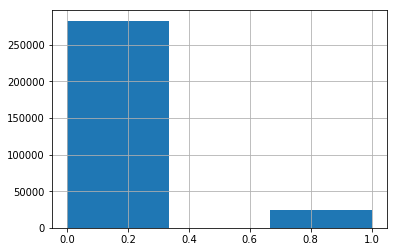

In [16]:
app_train['TARGET'].hist(bins=3)
print('Number of training instances with TARGET 0 : {}'.format(app_train[app_train['TARGET']<=0].shape[0]))
print('Number of training instances with TARGET 1 : {}'.format(app_train[app_train['TARGET']>0].shape[0]))

null values in NAME_TYPE_SUITE : 1292
not null values in NAME_TYPE_SUITE : 306219

List of values for NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object


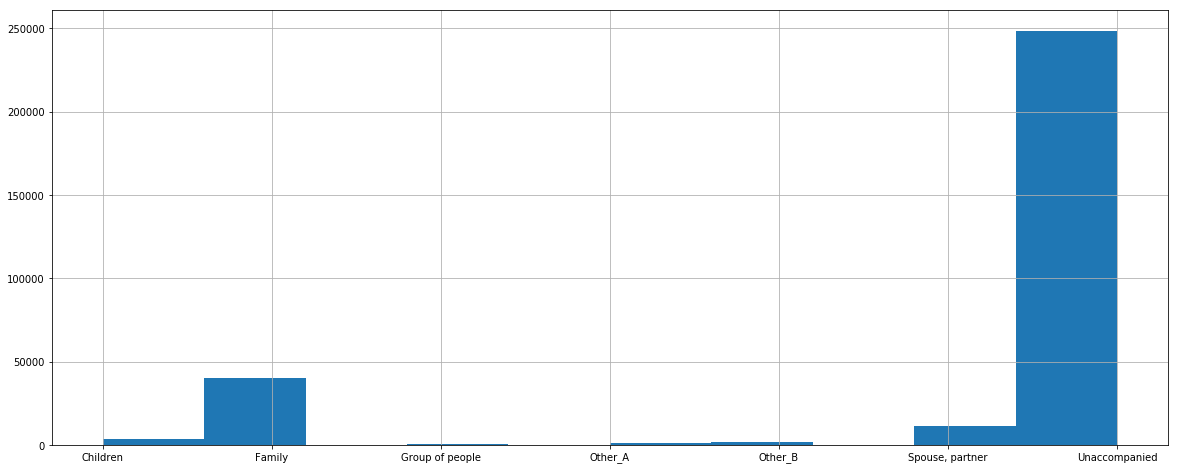

In [91]:
col_name = 'NAME_TYPE_SUITE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

null values in OCCUPATION_TYPE : 96391
not null values in OCCUPATION_TYPE : 211120

List of values for OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


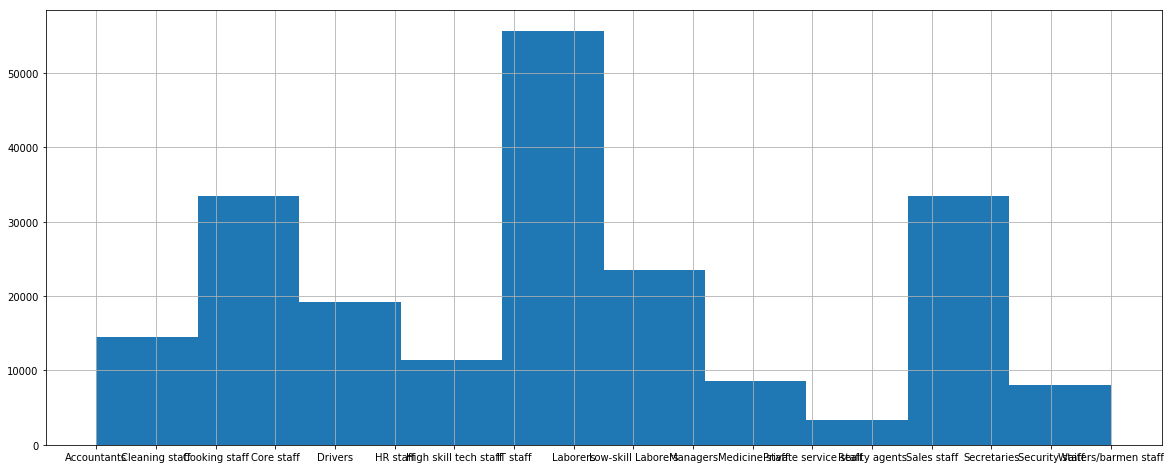

In [92]:
col_name = 'OCCUPATION_TYPE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

null values in WALLSMATERIAL_MODE : 156341
not null values in WALLSMATERIAL_MODE : 151170

List of values for WALLSMATERIAL_MODE : ['Stone, brick' 'Block' nan 'Panel' 'Mixed' 'Wooden' 'Others' 'Monolithic']

count     151170
unique         7
top        Panel
freq       66040
Name: WALLSMATERIAL_MODE, dtype: object


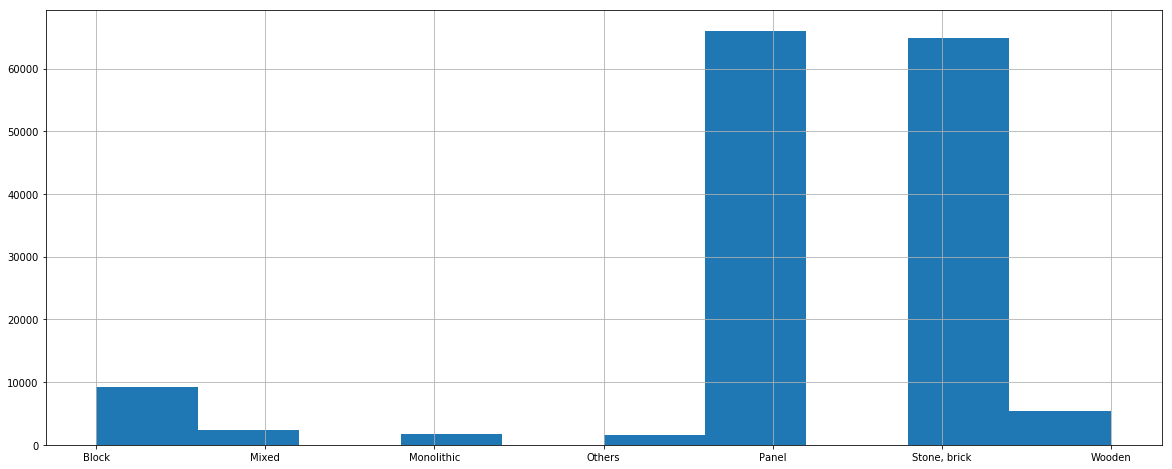

In [95]:
col_name = 'WALLSMATERIAL_MODE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

null values in ORGANIZATION_TYPE : 0
not null values in ORGANIZATION_TYPE : 307511

List of values for ORGANIZATION_TYPE : ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Ind

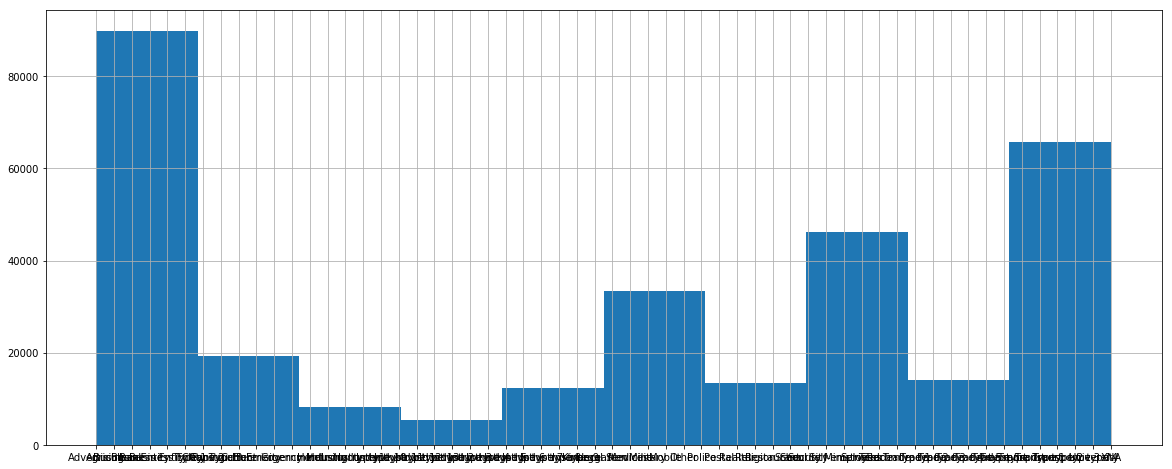

In [96]:
col_name = 'ORGANIZATION_TYPE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

In [ ]:

pd.scatter_matrix(app_train[features], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

C:\Users\braian.dias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


KeyboardInterrupt: 